# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
df = pd.read_csv(r"Google-Playstore.csv")
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
df.shape

(2312944, 24)

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [7]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [8]:
print("Dropping the following columns - AppId, DeveloperWebsite, DeveloperEmail, PrivacyPolicy, Currency, DeveloperId, ScrapedTime, MinimumAndroid")
df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'],axis=1)
df.head()

Dropping the following columns - AppId, DeveloperWebsite, DeveloperEmail, PrivacyPolicy, Currency, DeveloperId, ScrapedTime, MinimumAndroid


,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


 ## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Missing null values')

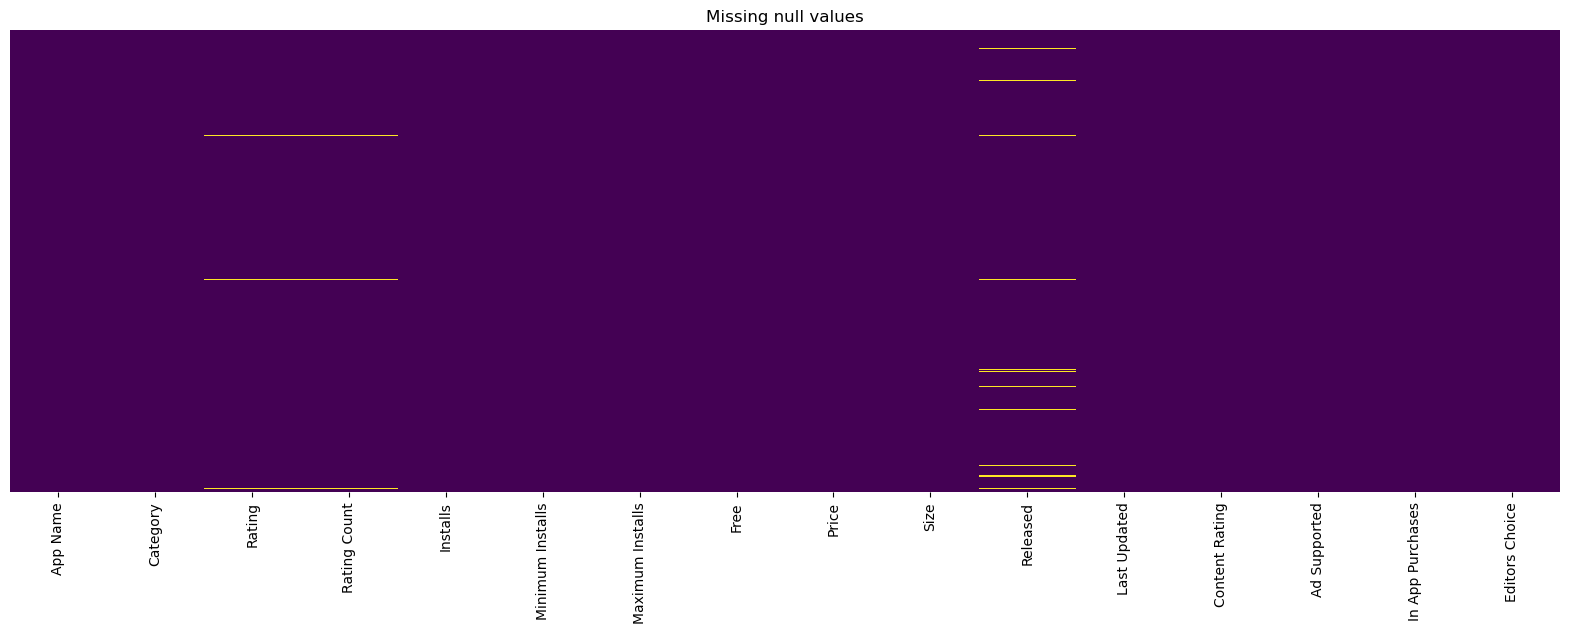

In [9]:
plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [10]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df) *100
missing_percentage

Released            3.071972
Rating              0.989345
Rating Count        0.989345
Size                0.008474
Installs            0.004626
Minimum Installs    0.004626
App Name            0.000086
Category            0.000000
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

Text(0.5, 1.0, 'Missing percentage of null values')

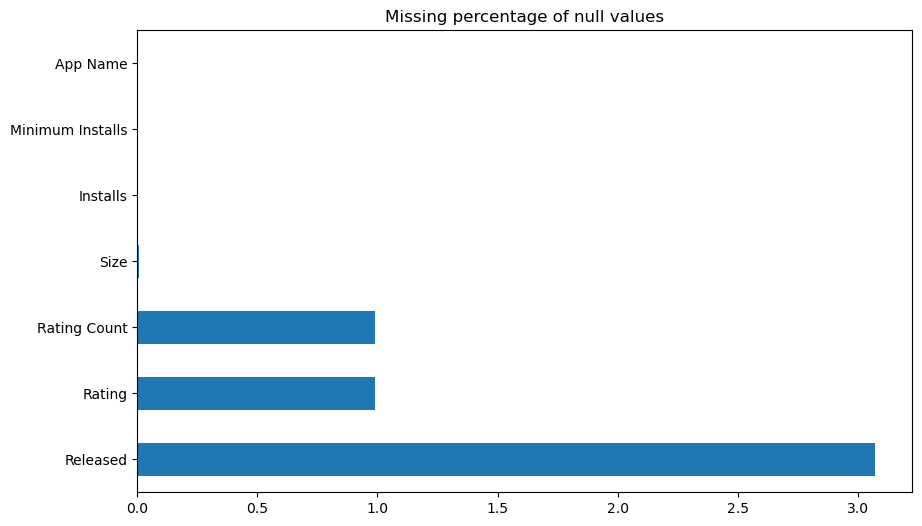

In [11]:
#Let's plot the missing percentage of null values
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.figure(figsize=(10,6))
missing_percentage.plot(kind='barh')
plt.title("Missing percentage of null values")

### 1) The columns having highest percentage of missing values are :
- Developer Website
- Privacy Policy
- these two columns are not that much helpful so we can drop it
### 2) we can drop the small null values for the columns :
- Size
- Currency
- Installs
- Minimum Installs
- Developer Id
- Developer Email
### 3) Rating,Rating Count,Released are important column so it is good to fill the null values.
- Rating
- Rating count
- Minimum Andriod
- Released

## Data Cleaning

In [12]:
# df.dropna(subset = ['App Name','Size','Installs','Minimum Installs'], inplace = True)

In [13]:
df.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [14]:
##from observation 1 drop the not necessary cols
# df = df.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'],axis=1)

In [15]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [16]:
# here i see the nan val 
df['Rating'] = df['Rating'].astype(float)
avg = round(df['Rating'].mean(),1)
df['Rating'].fillna(avg,inplace=True) # fill nan val by avg 

In [17]:
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [18]:
# fill all null val by avg
df['Rating Count'] = df['Rating Count'].astype(float)
avg = round(df['Rating Count'].mean(),1)
df['Rating Count'].fillna(avg,inplace=True) # fill nan val by avg 

In [19]:
df.isnull().sum()

App Name                2
Category                0
Rating                  0
Rating Count            0
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

## Exploring the Numerical features

In [20]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              object 
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 220.6+ MB


In [22]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [23]:
df.dropna(subset=['Size','Minimum Installs','Installs','App Name'],inplace=True)
df.dropna(subset=['App Name'],inplace=True)

In [24]:
df.Installs = df.Installs.str.replace(',','') #replace the commas ',' in the install column
df.Installs = df.Installs.str.replace('+','')  # reomoves the + symbol
df.Installs = df.Installs.str.replace('Free','0') # covert the free type to num (0)
df['Installs'] = pd.to_numeric(df['Installs'])  # converting it to the int type

/var/folders/f4/cdw0zr4j2x96b1q7008qxr2w0000gn/T/ipykernel_13057/3463138553.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Installs = df.Installs.str.replace('+','')  # reomoves the + symbol


In [25]:
df['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

In [26]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [27]:
# The Size of data can be in GB, MB and KB let's convert the data into the size in MB

In [28]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [29]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

In [30]:
# conversion of kbs to mb
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
     

In [31]:
# we get an another mismatch value in the data set which is 'Varies with device' it means the size of the App may vaies with the device---> but here I am assuming it as 0
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [32]:
# conversion of data Gbs to Mb
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [33]:
df['Size'] = df['Size'].apply(lambda x: float(x))

In [34]:
# let’s see the type of the size
df.dtypes['Size']

dtype('float64')

In [35]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3          Everyone
4          Everyone
             ...   
2312939        Teen
2312940    Everyone
2312941    Everyone
2312942    Everyone
2312943    Everyone
Name: Content Rating, Length: 2312640, dtype: object

In [36]:
df['Content Rating'].value_counts()

Everyone           2021869
Teen                196318
Mature 17+           60280
Everyone 10+         33883
Unrated                154
Adults only 18+        136
Name: Content Rating, dtype: int64

In [37]:
df['Content Rating'] = df['Content Rating'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 

df['Content Rating'] = df['Content Rating'].replace('Mature 17+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Adults only 18+',"Adults")
df['Content Rating'] = df['Content Rating'].replace('Everyone 10+',"Everyone")

In [38]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [39]:
df['Free'] 

0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312640, dtype: bool

In [40]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

In [41]:
df['Type']

0          Free
1          Free
2          Free
3          Free
4          Free
           ... 
2312939    Free
2312940    Free
2312941    Free
2312942    Free
2312943    Free
Name: Type, Length: 2312640, dtype: object

In [42]:
df['PriceRange'] = pd.cut(df['Price'],bins=[0,0.19,9.99,29.99,410],labels=['Free','Low','Mid','High'],include_lowest=True)
#dummies = pd.get_dummies(df['PriceRange'],prefix='Price')
#df = df.join(dummies)
df['PriceRange'].value_counts()

Free    2267708
Low       41968
Mid        2092
High        872
Name: PriceRange, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312640 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App Name          object  
 1   Category          object  
 2   Rating            float64 
 3   Rating Count      float64 
 4   Installs          int64   
 5   Minimum Installs  float64 
 6   Maximum Installs  int64   
 7   Price             float64 
 8   Size              float64 
 9   Released          object  
 10  Last Updated      object  
 11  Content Rating    object  
 12  Ad Supported      bool    
 13  In App Purchases  bool    
 14  Editors Choice    bool    
 15  Type              object  
 16  PriceRange        category
dtypes: bool(3), category(1), float64(5), int64(2), object(6)
memory usage: 255.8+ MB


In [44]:
df.isnull().sum()

App Name                0
Category                0
Rating                  0
Rating Count            0
Installs                0
Minimum Installs        0
Maximum Installs        0
Price                   0
Size                    0
Released            70758
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Type                    0
PriceRange              0
dtype: int64

In [45]:
df['Rating Count']

0              0.0
1             64.0
2              0.0
3              5.0
4              0.0
            ...   
2312939    16775.0
2312940        0.0
2312941        0.0
2312942        8.0
2312943       12.0
Name: Rating Count, Length: 2312640, dtype: float64

In [46]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'Rating Type'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'Rating Type'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'Rating Type'] = 'More than 500K'
df['Rating Type'].value_counts()

Less than 10K           1215434
NoRatingProvided        1059762
Between 10K and 500K      35779
More than 500K             1665
Name: Rating Type, dtype: int64

In [47]:
df['Rating Type']

0              NoRatingProvided
1                 Less than 10K
2              NoRatingProvided
3                 Less than 10K
4              NoRatingProvided
                   ...         
2312939    Between 10K and 500K
2312940        NoRatingProvided
2312941        NoRatingProvided
2312942           Less than 10K
2312943           Less than 10K
Name: Rating Type, Length: 2312640, dtype: object

## Data Analysis & Visualization

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312640 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype   
---  ------            -----   
 0   App Name          object  
 1   Category          object  
 2   Rating            float64 
 3   Rating Count      float64 
 4   Installs          int64   
 5   Minimum Installs  float64 
 6   Maximum Installs  int64   
 7   Price             float64 
 8   Size              float64 
 9   Released          object  
 10  Last Updated      object  
 11  Content Rating    object  
 12  Ad Supported      bool    
 13  In App Purchases  bool    
 14  Editors Choice    bool    
 15  Type              object  
 16  PriceRange        category
 17  Rating Type       object  
dtypes: bool(3), category(1), float64(5), int64(2), object(7)
memory usage: 273.5+ MB


### Top 10 Categories that are installed from the Google Play Store

In [49]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [50]:
top_Category = df['Category'].value_counts().reset_index().rename(columns= {'index':'Category','Category':'Count'})
top_Category 

,Category,Count
0,Education,241076
1,Music & Audio,154899
2,Tools,143973
3,Business,143761
4,Entertainment,138267
5,Lifestyle,118324
6,Books & Reference,116726
7,Personalization,89209
8,Health & Fitness,83500
9,Productivity,79686


In [51]:
Category_installs =df.groupby(['Category'])[['Installs']].sum()
Category_installs 

,Installs
Category,
Action,17399865338
Adventure,5390108856
Arcade,14501231855
Art & Design,1116398902
Auto & Vehicles,1594745418
Beauty,404328787
Board,3290826664
Books & Reference,4820200679
Business,5236668672


In [52]:
top_Category_installs = pd.merge(top_Category, Category_installs,on ='Category')
top_Category_installs.head()

,Category,Count,Installs
0,Education,241076,5984072052
1,Music & Audio,154899,14239411798
2,Tools,143973,71440421217
3,Business,143761,5236668672
4,Entertainment,138267,17108504993


In [53]:
top_10_Category_installs= top_Category_installs.head(10).sort_values(by= ['Installs'],ascending = False)
top_10_Category_installs

,Category,Count,Installs
2,Tools,143973,71440421217
9,Productivity,79686,28314042273
4,Entertainment,138267,17108504993
1,Music & Audio,154899,14239411798
7,Personalization,89209,9252977243
5,Lifestyle,118324,5997922696
0,Education,241076,5984072052
3,Business,143761,5236668672
6,Books & Reference,116726,4820200679
8,Health & Fitness,83500,4586601751


Text(0.5, 1.0, 'Top 10 Installed Categories')

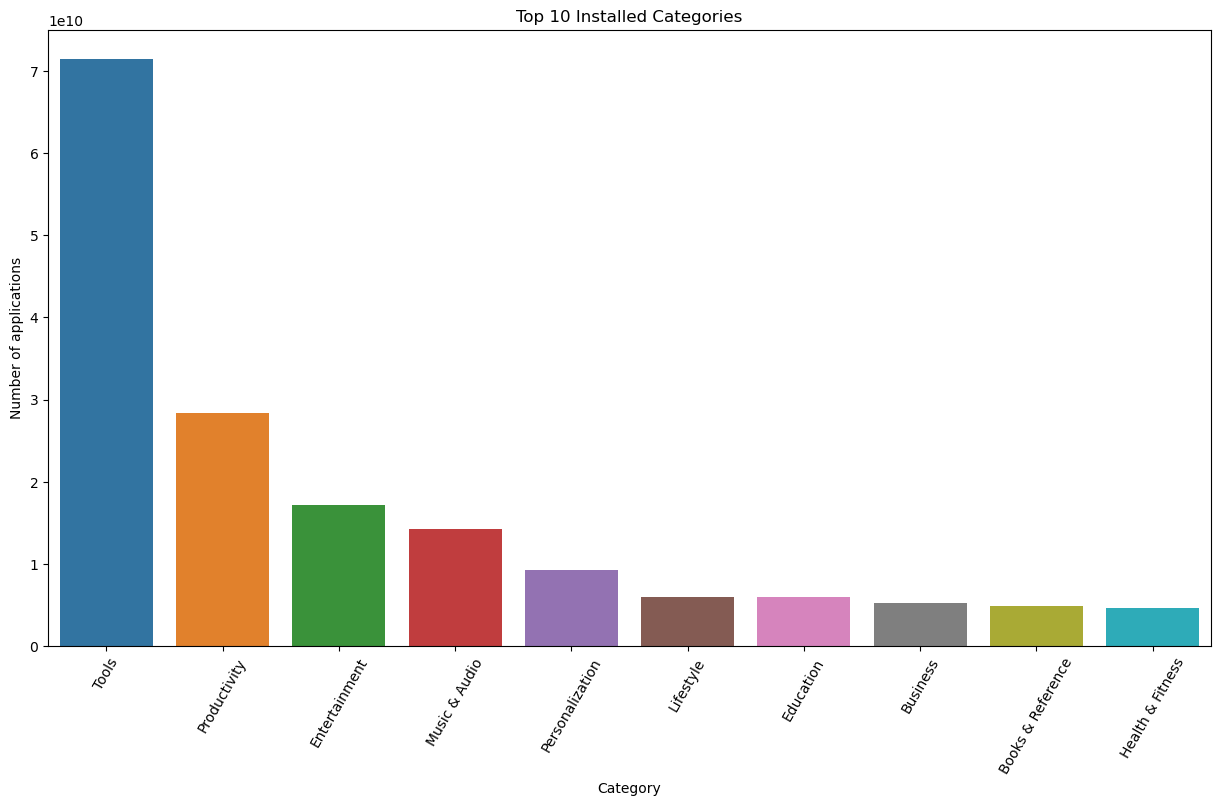

In [54]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)
sns.barplot(x= top_10_Category_installs.Category ,y = top_10_Category_installs.Installs)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")

In [55]:
x=0
print ('The top 10 Category installs : ')
for i in top_10_Category_installs.Category:
    x=x +1
    print (f"{x}- {i}")
    

The top 10 Category installs : 
1- Tools
2- Productivity
3- Entertainment
4- Music & Audio
5- Personalization
6- Lifestyle
7- Education
8- Business
9- Books & Reference
10- Health & Fitness


### Top 10 Categories in playstore as per the count

<Axes: title={'center': 'Top 10 Categories'}, xlabel='Category', ylabel='Count'>

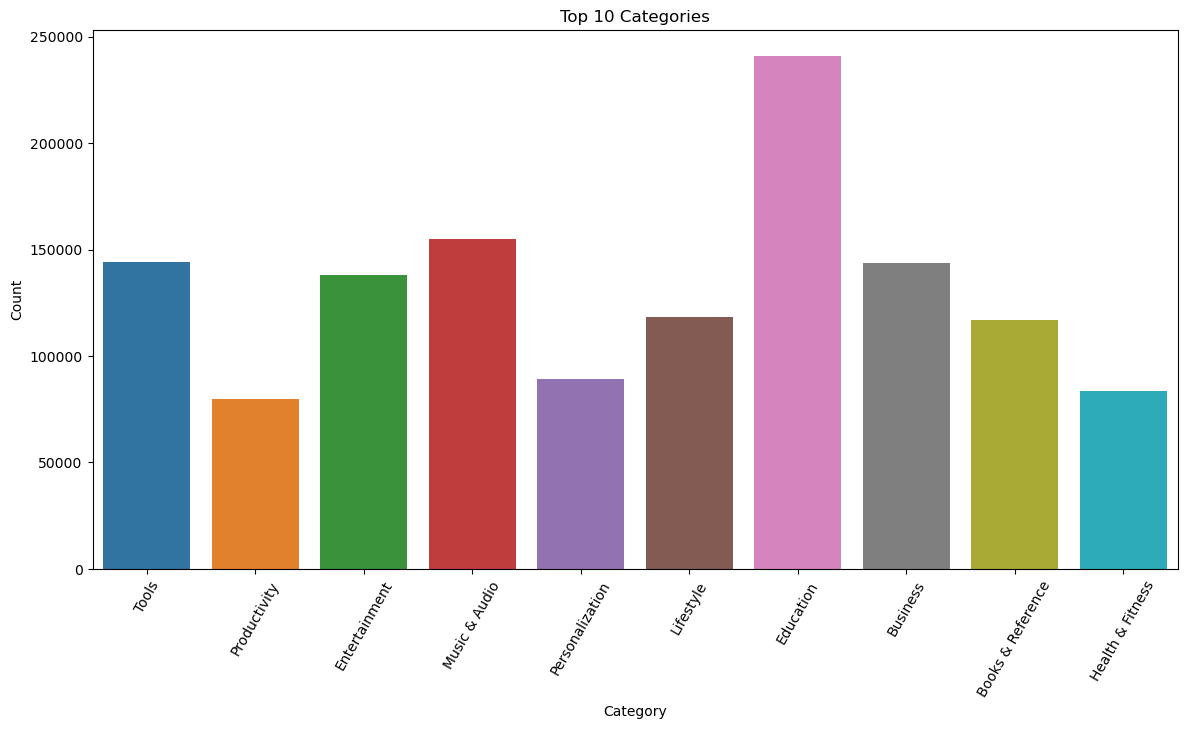

In [56]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Categories")
sns.barplot(x = top_10_Category_installs.Category, y = top_10_Category_installs.Count)

In [57]:
top_by_count = top_10_Category_installs.sort_values(by= ['Count'],ascending = False)
top_by_count

,Category,Count,Installs
0,Education,241076,5984072052
1,Music & Audio,154899,14239411798
2,Tools,143973,71440421217
3,Business,143761,5236668672
4,Entertainment,138267,17108504993
5,Lifestyle,118324,5997922696
6,Books & Reference,116726,4820200679
7,Personalization,89209,9252977243
8,Health & Fitness,83500,4586601751
9,Productivity,79686,28314042273


In [58]:
x=0
print ('The top 10 Category counts : ')
for i in top_by_count.Category:
    x=x +1
    print (f"{x}- {i}")
    

The top 10 Category counts : 
1- Education
2- Music & Audio
3- Tools
4- Business
5- Entertainment
6- Lifestyle
7- Books & Reference
8- Personalization
9- Health & Fitness
10- Productivity


/var/folders/f4/cdw0zr4j2x96b1q7008qxr2w0000gn/T/ipykernel_13057/3018327126.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.Rating, color="Blue", shade = True)


Text(0.5, 1.0, 'Distribution of Rating')

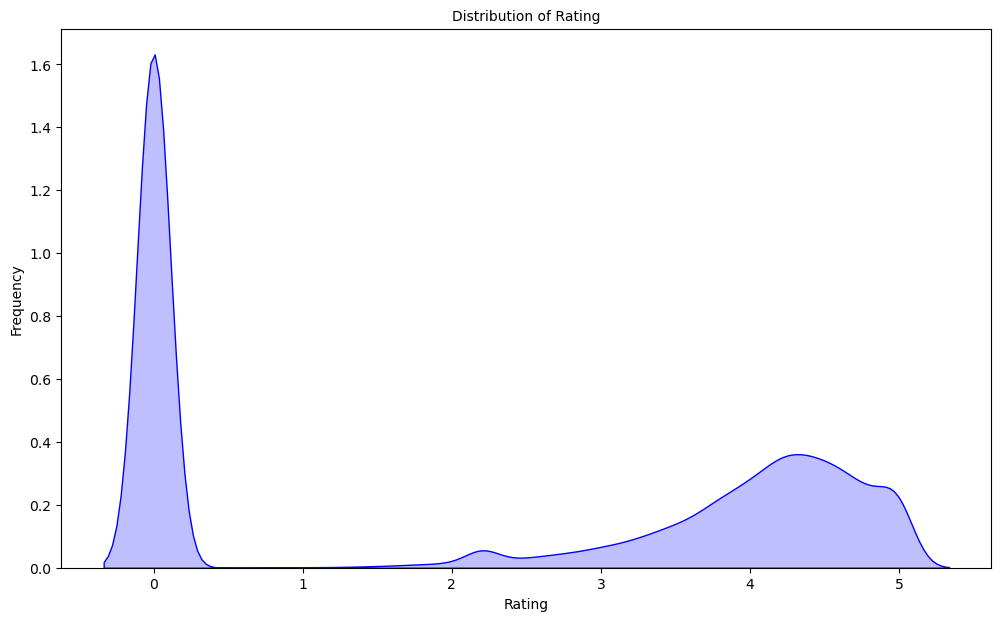

In [59]:
# Rating distribution
plt.figure(figsize=(12,7))
sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Distribution of Rating',size = 10)

<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

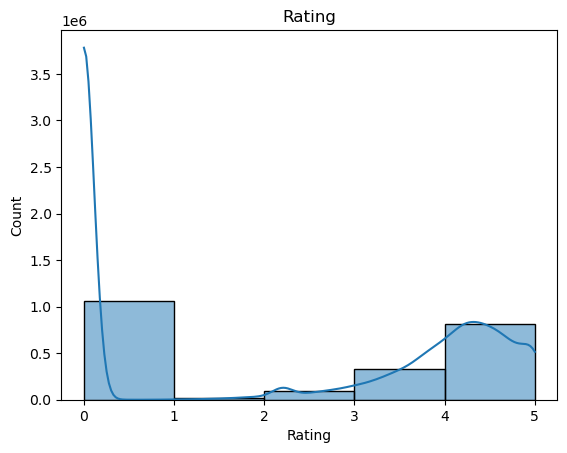

In [60]:
plt.title("Rating")
sns.histplot(df.Rating,kde=True,bins=5)

- From the two plots we can see that most people does not give a rating, but looks like the people tend to give 4+ rating the most.

### Highest rated Category

<Axes: title={'center': 'All Categories Rating '}, xlabel='Category', ylabel='Rating'>

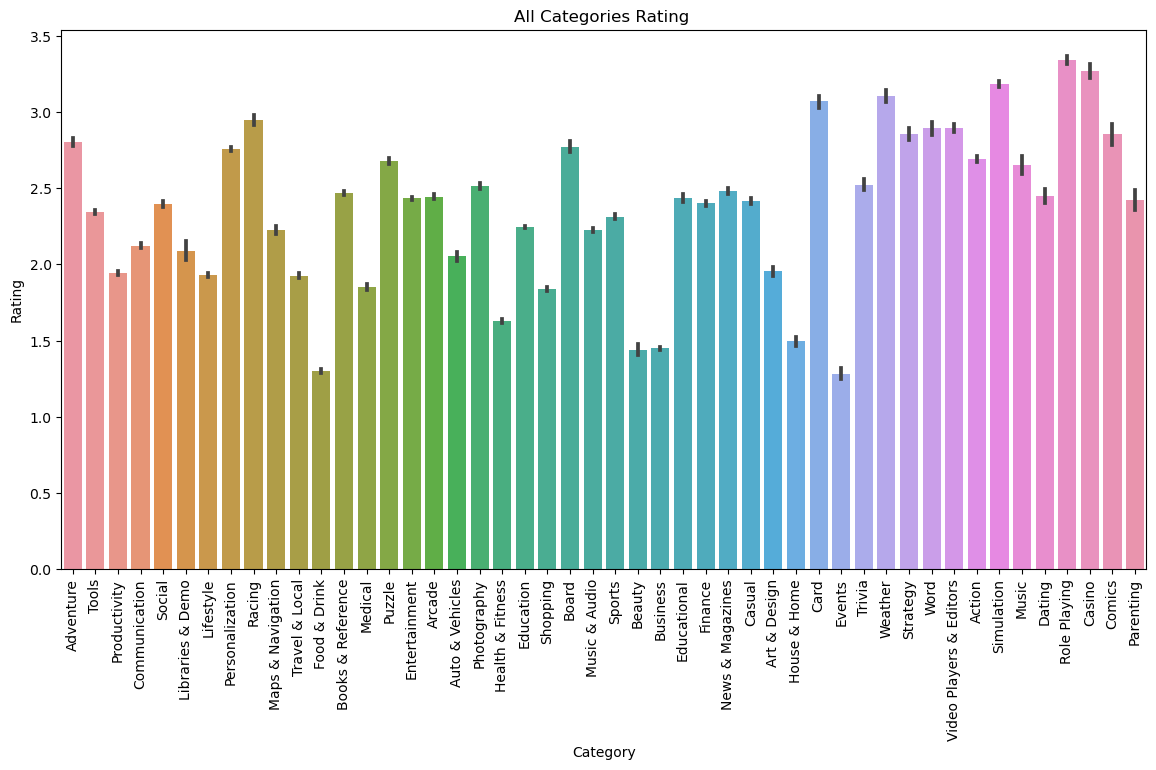

In [61]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.Category,y = df.Rating)

- From the plot we can see that Role Playing is the highest Rated category

<Axes: title={'center': 'Content Rating and Maximum installations '}, xlabel='Maximum Installs', ylabel='Rating Count'>

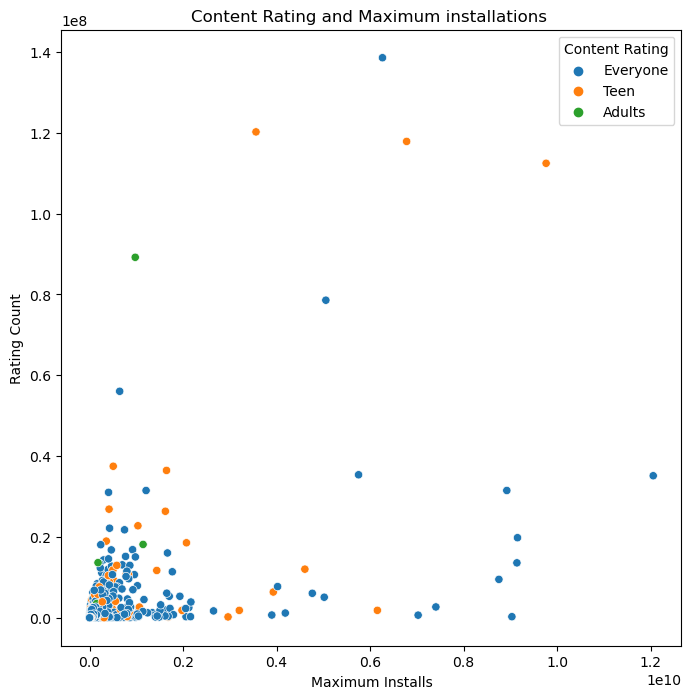

In [62]:
# Show the most rated age 
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

- This scatterplot shows us that (excluding 'everyone' category), we can see that teens have much engagement in terms of download and rating count

### Category that has the highest Paid and Free apps

Text(0.5, 1.0, 'Free and Paid Apps in Category')

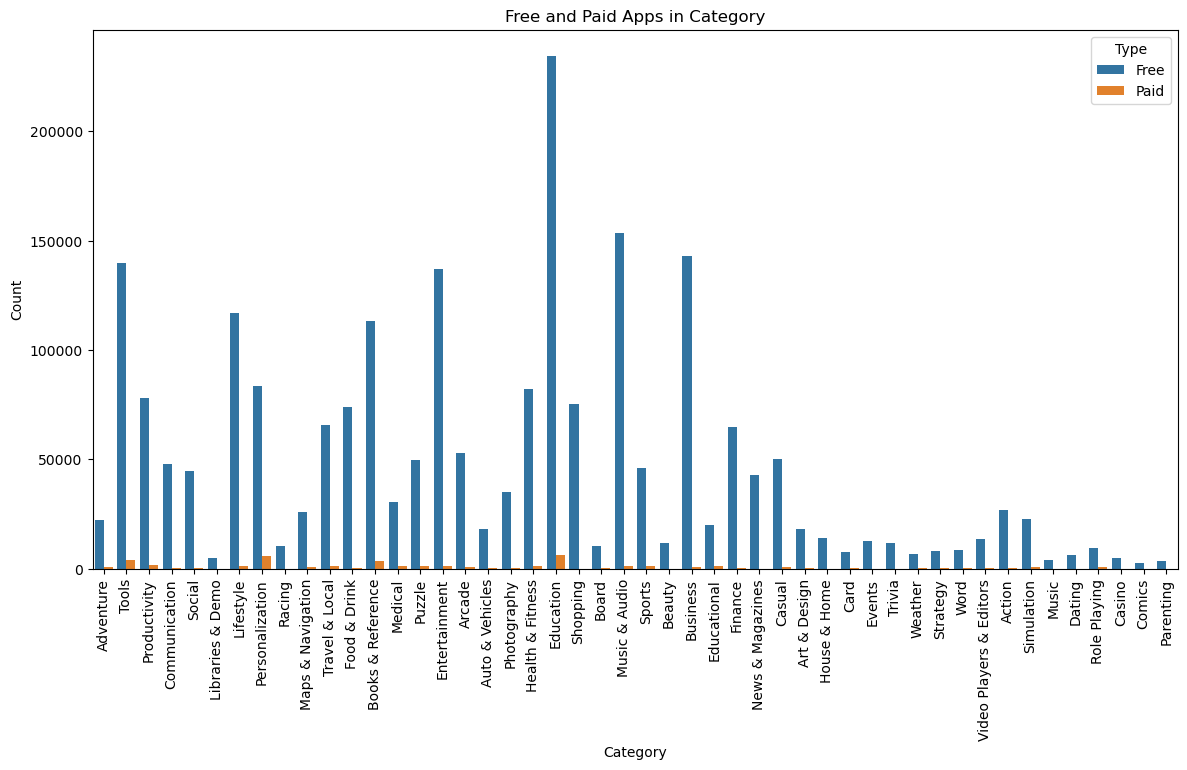

In [63]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
sns.countplot(x=df['Category'],hue=df['Type'])
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Free and Paid Apps in Category")

- Education Category is the highest in paid apps list
- It looks like certain app categories have more free apps available for download than others. 
- In our dataset, the majority of apps in Business,Education, Music & Audio, Tools as well as Social categories were free to install. At the same time Books & References, Education, Tools and Personalization categories had the biggest number of paid apps available for Installation.

/var/folders/f4/cdw0zr4j2x96b1q7008qxr2w0000gn/T/ipykernel_13057/3241408023.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')


<Axes: >

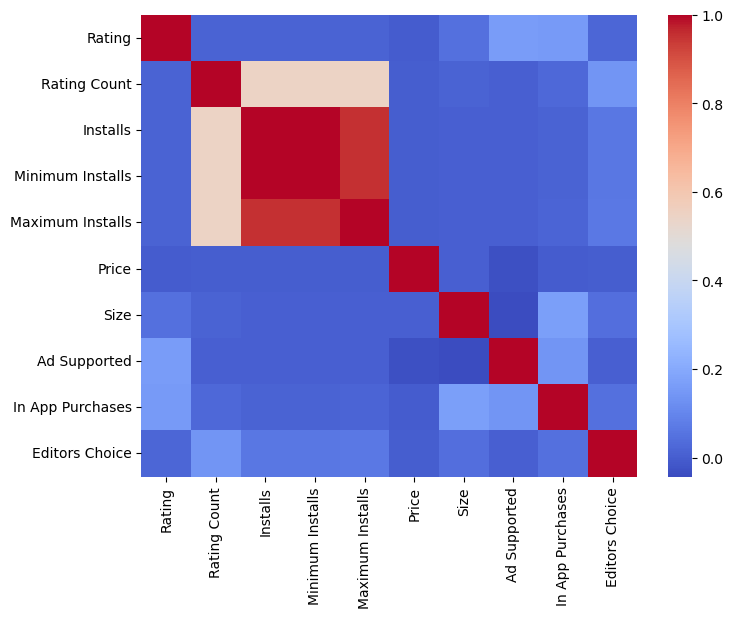

In [64]:
# show correlations between features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar= True, cmap='coolwarm')

### Top 5 Paid Apps based on Highest ratings and Installs

In [65]:
paid_apps  = df[(df['Type']== 'Paid') & (df['Installs'] >= 5000000)]
paid_apps 

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Type,PriceRange,Rating Type
6302,True Skate,Sports,4.4,191460.0,5000000,5000000.0,7040478,1.99,99.0,"Jul 19, 2013","Jun 07, 2021",Everyone,True,True,False,Paid,Low,Between 10K and 500K
508696,Hitman Sniper,Action,4.4,854992.0,10000000,10000000.0,24958893,0.99,48.0,"Jun 3, 2015","Aug 24, 2020",Adults,True,True,True,Paid,Low,More than 500K
837351,Minecraft,Arcade,4.6,4132618.0,10000000,10000000.0,36183322,7.49,0.0,"Aug 15, 2011","May 27, 2021",Everyone,False,True,True,Paid,Low,More than 500K
1354758,Stickman Downhill Motocross,Racing,2.2,2864.8,10000000,10000000.0,12493513,0.00,50.0,"Jan 31, 2014","May 27, 2020",Everyone,True,True,False,Paid,Free,Less than 10K
1859983,Stickman Legends-Shadow Fight Premium Offline ...,Action,4.3,235762.0,10000000,10000000.0,13264461,0.99,126.0,"May 10, 2017","Jun 08, 2021",Everyone,True,True,False,Paid,Low,Between 10K and 500K
1933739,Poweramp Full Version Unlocker,Music & Audio,4.2,55111.0,5000000,5000000.0,5481771,4.99,0.0,"Nov 7, 2010","Jan 20, 2020",Everyone,False,False,False,Paid,Low,Between 10K and 500K
2052997,League of Stickman 2020- Ninja Arena PVP(Dream...,Action,4.1,65269.0,5000000,5000000.0,5621942,0.99,44.0,"Sep 3, 2016","Dec 30, 2020",Teen,True,True,False,Paid,Low,Between 10K and 500K


In [66]:
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
paid_apps

App Name
Minecraft                                             4.6
Hitman Sniper                                         4.4
True Skate                                            4.4
Stickman Legends-Shadow Fight Premium Offline Game    4.3
Poweramp Full Version Unlocker                        4.2
League of Stickman 2020- Ninja Arena PVP(Dreamsky)    4.1
Stickman Downhill Motocross                           2.2
Name: Rating, dtype: float64

<Axes: title={'center': 'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

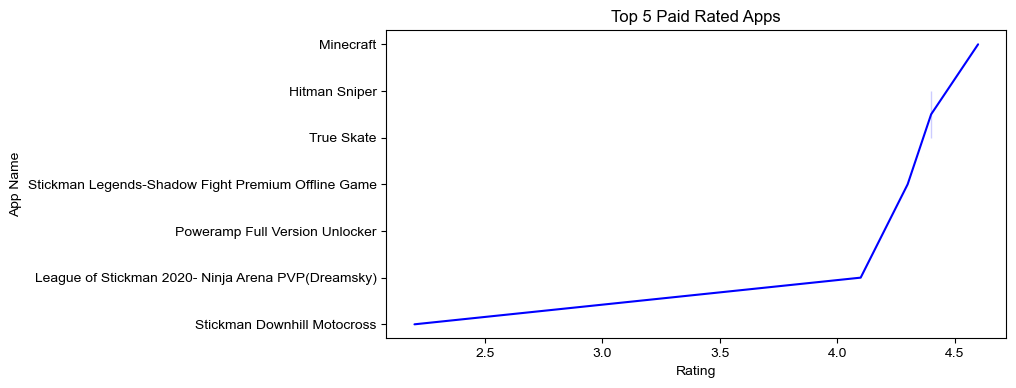

In [67]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')

- Minecraft, Hitman Sniper, True Skate, Stickman Legends-Shadow Fight Premium Offline Game, Poweramp Full Version Unlocker, League of Stickman 2020- Ninja Arena PVP(Dreamsky)

### Top 5 Free Apps based on highest Ratings and Installs

In [68]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
free_apps = free_apps.head(5)

<Axes: title={'center': 'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

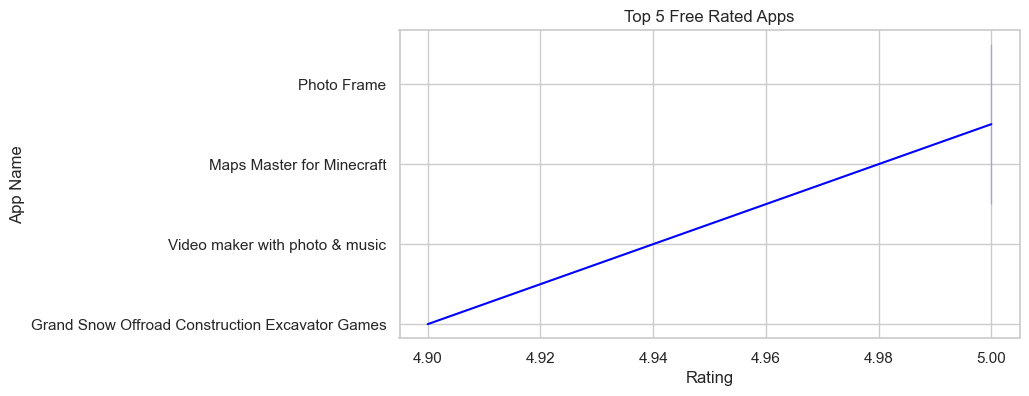

In [69]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x = free_apps.values, y = free_apps.index,color = 'Blue')

- Photo Frame, Video maker with photo & music, Kuku FM - Love Stories,Audio Books & Podcasts, Plank Workout at Home.

### Categories with Top 10 Max Installations

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

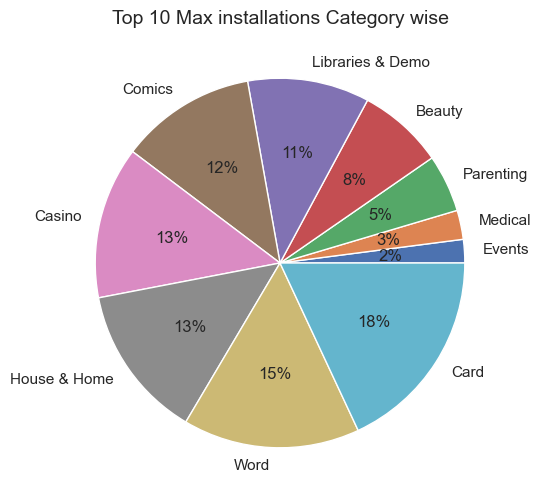

In [70]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%') 
plt.title("Top 10 Max installations Category wise", fontsize=14)

### Top 10 installation Categories that Adults have installed the most

In [71]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

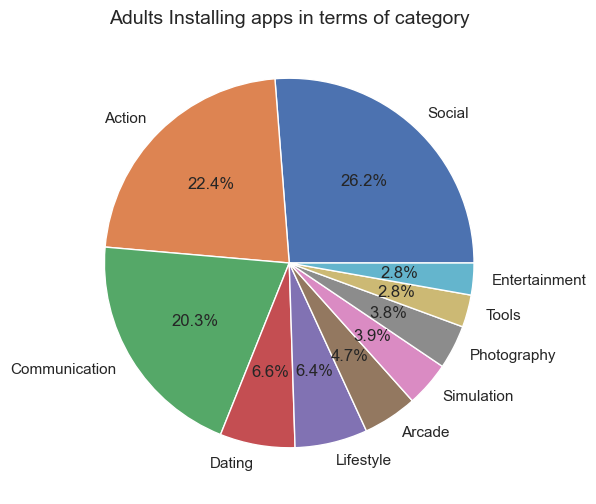

In [72]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

- Most of the Adults show interest in downloading the Social, Action and Communication Category

### Distribution of App category that Teens install

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

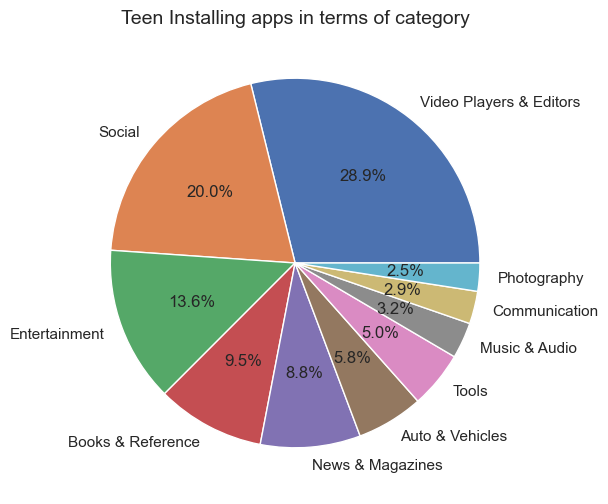

In [73]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x = Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category", fontsize=14)
     

- Most of the Teens show interest in downloading the Social, Video Players & Eiditors and Entertainment

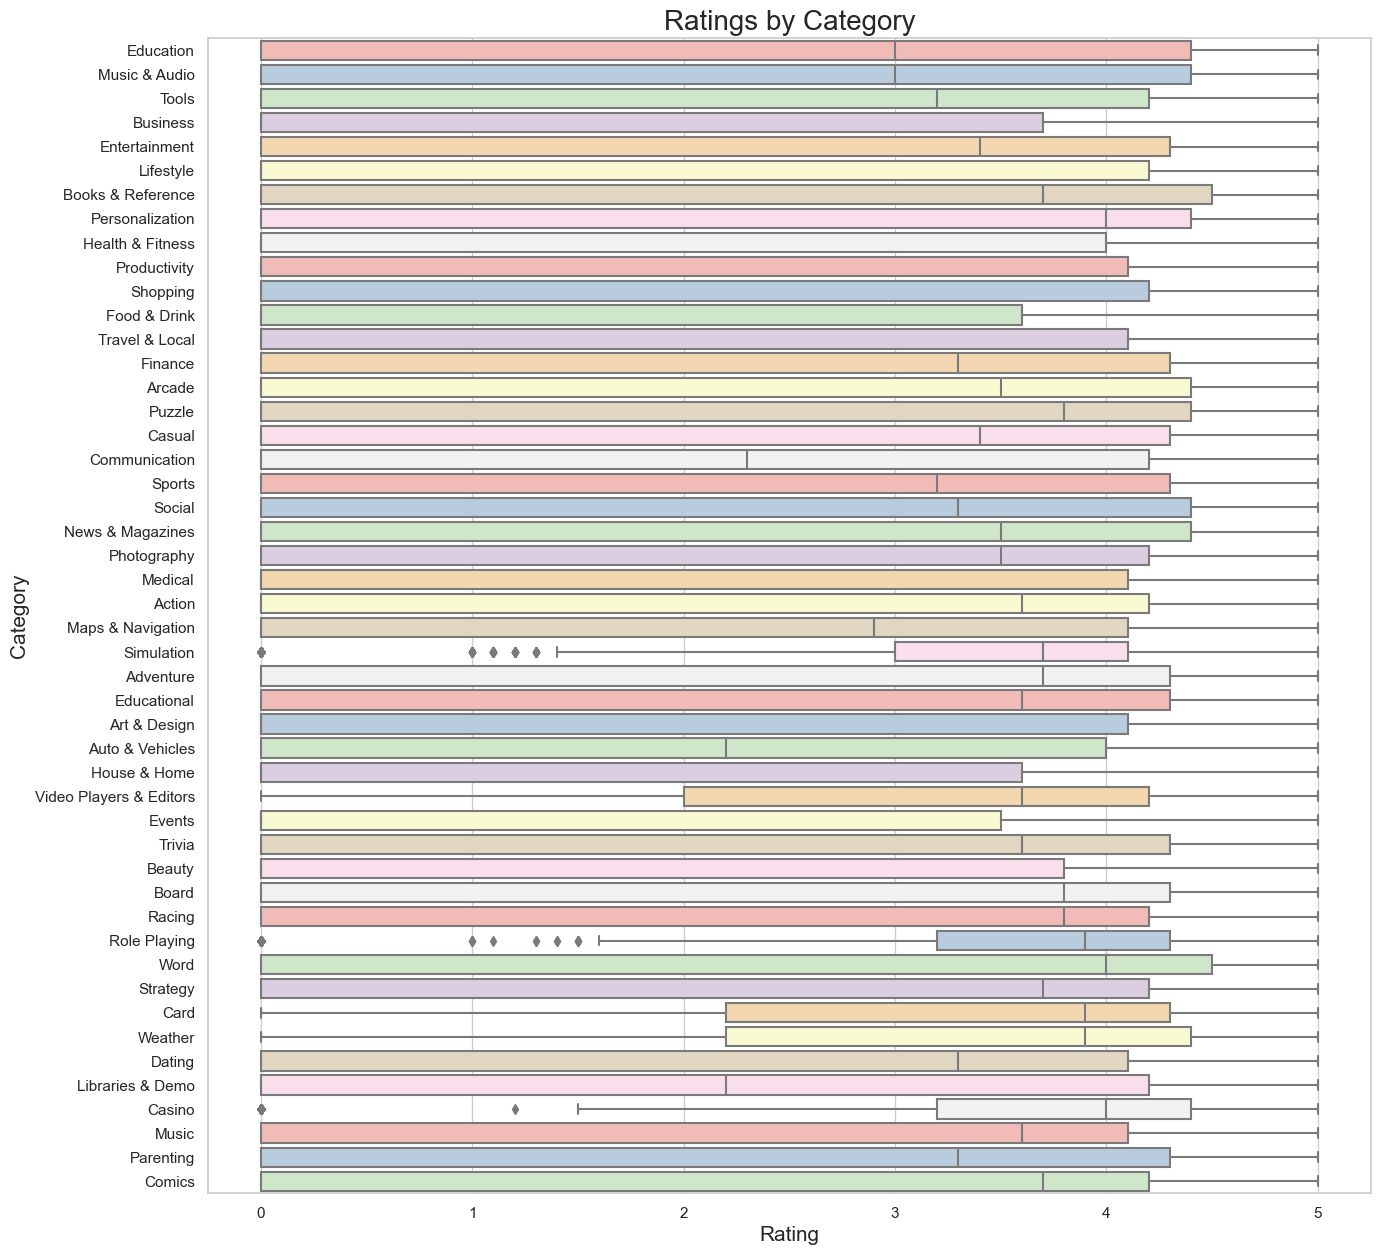

In [74]:
f, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x="Rating", y="Category", data=df,palette="Pastel1",order = df['Category'].value_counts().index)
plt.title("Ratings by Category", fontsize = '20')
plt.ylabel('Category',fontsize = '15')
plt.xlabel('Rating',fontsize = '15');

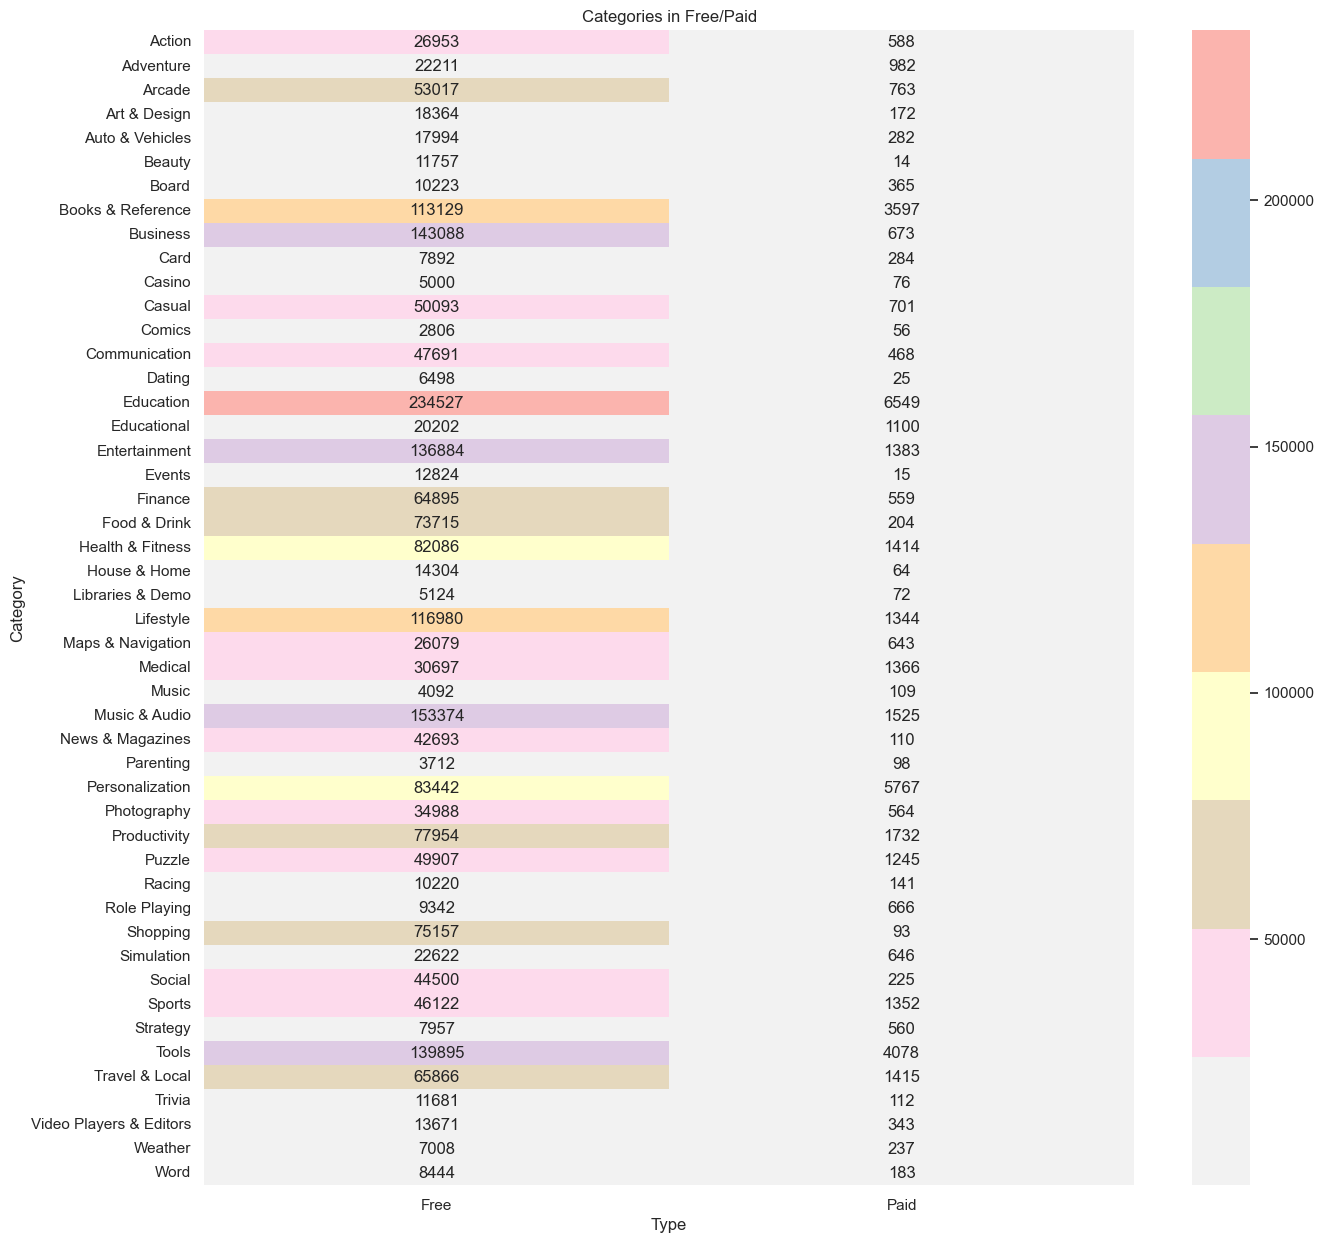

In [75]:
plt.figure(figsize=(15,15))
plt.title("Categories in Free/Paid")
sns.heatmap(pd.crosstab(df['Category'], df["Type"]),annot=True,fmt='g', cmap="Pastel1_r")
plt.show()

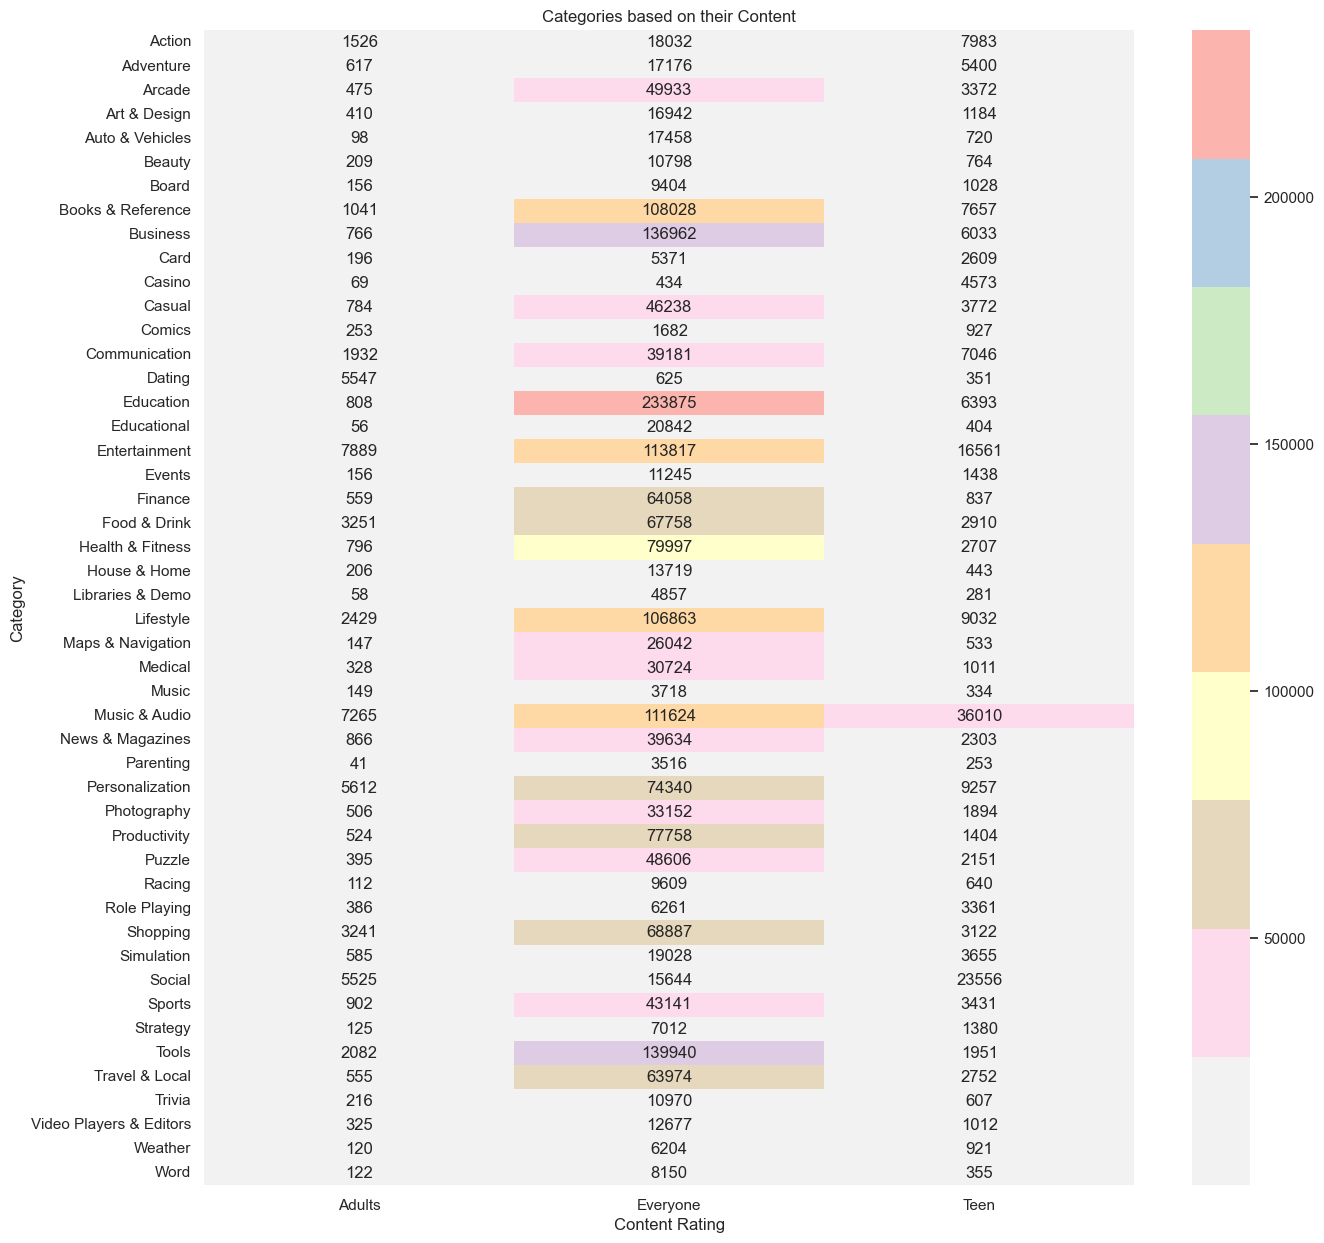

In [76]:
plt.figure(figsize=(15,15))
plt.title("Categories based on their Content")
sns.heatmap(pd.crosstab(df['Category'], df["Content Rating"]),annot=True,fmt='g', cmap="Pastel1_r");
plt.show()

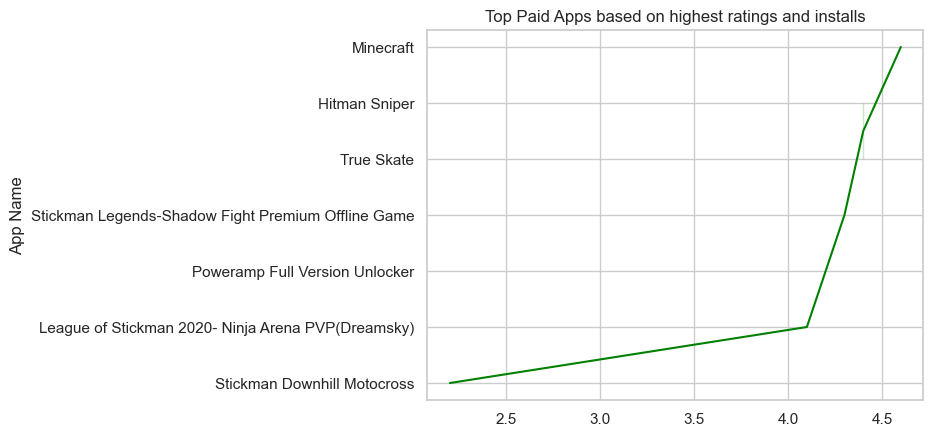

In [77]:
# Top paid apps based on their ratings and Installs

paid_apps = df[(df.Type=='Paid') & (df.Installs == 5000000) | ((df.Type=='Paid') & (df.Installs == 10000000))]
paid_apps = paid_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False)
paid_apps = paid_apps.head(10)
plt.title("Top Paid Apps based on highest ratings and installs")

ax = sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='green');

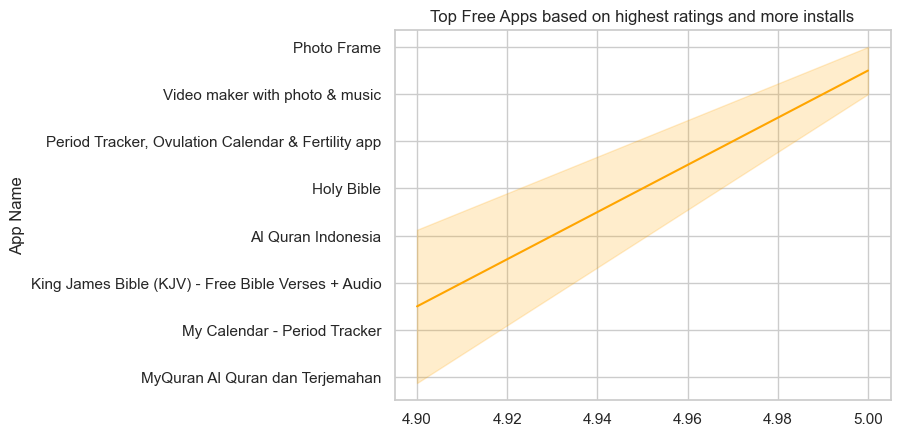

In [78]:
# Top Free apps based on their ratings and installs

free_apps = df[(df.Type=='Free') & (df.Installs == 10000000)]
                                                   
free_apps = free_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False)
free_apps = free_apps.head(10)
plt.title("Top Free Apps based on highest ratings and more installs")
sns.lineplot(x=free_apps.values,y=free_apps.index,color='orange');

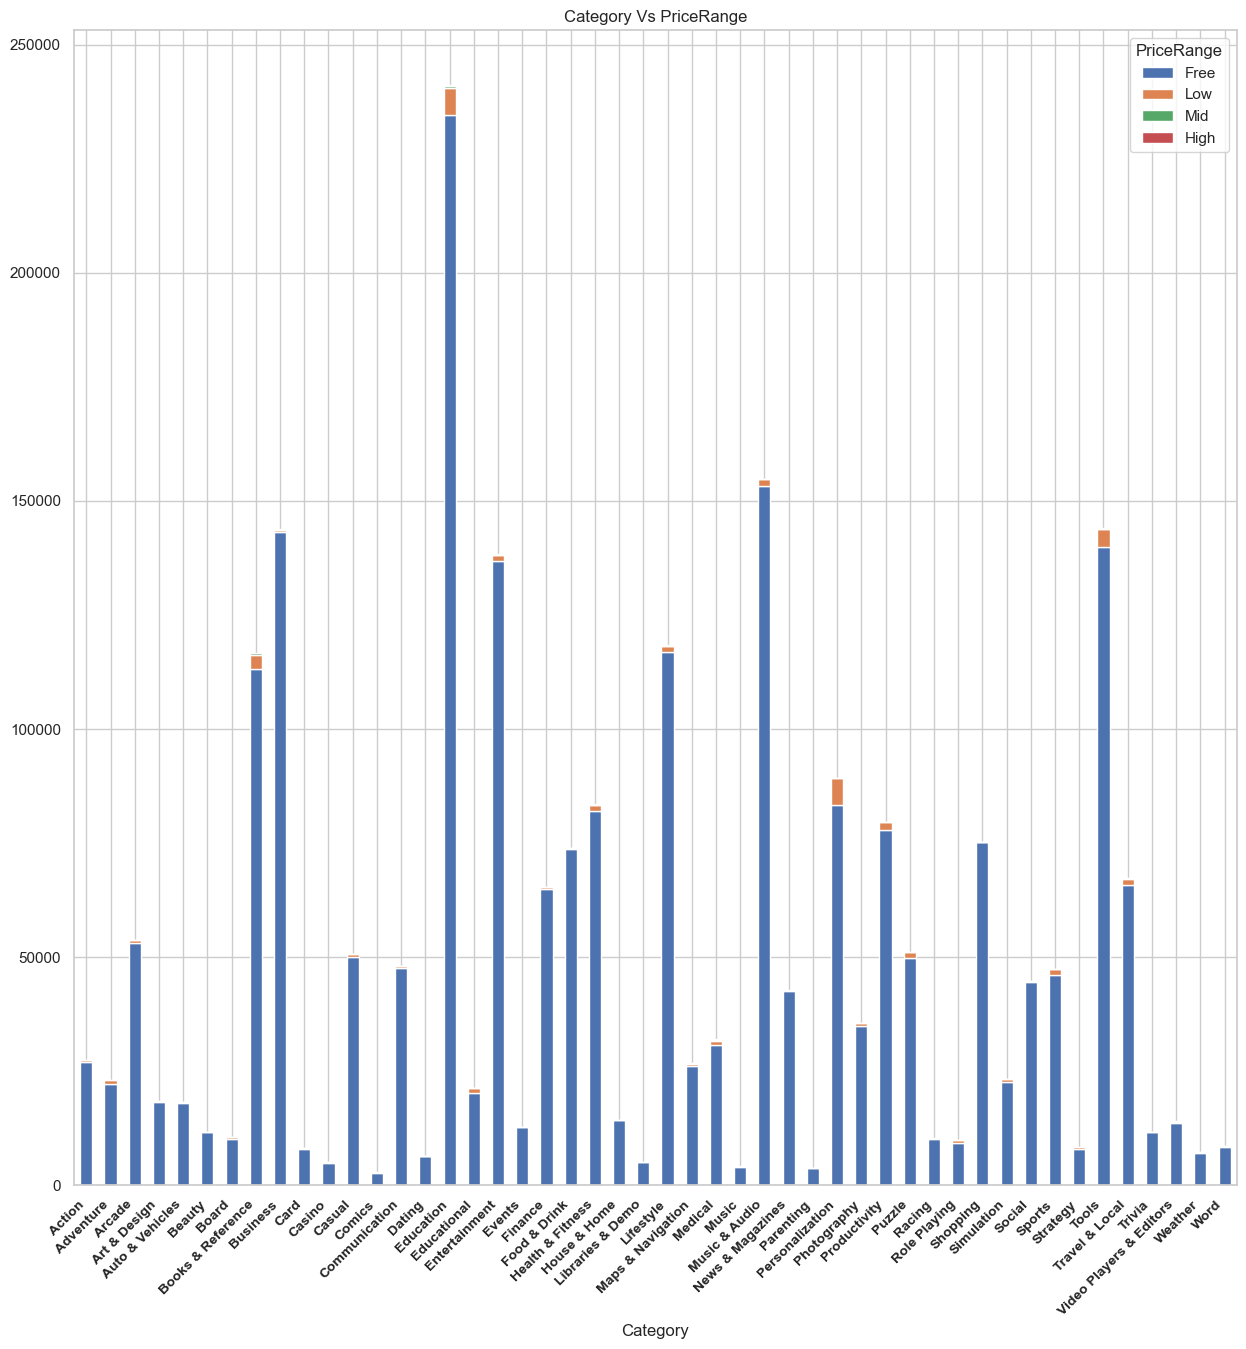

In [79]:
x = pd.crosstab(df['Category'],df['PriceRange'])
x.plot(kind='bar',stacked=True,figsize=(15,15))
plt.title("Category Vs PriceRange")
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right');

## Summary
- Gaming Apps are the most installed apps and bags the highest rating among the other popular categories.
- InAppPurchases are correlated to App rating. So we can say that if the app provides customer support and have subscription - - plans it will helps to engage customers.
- Most people haven't given any rating, but the people who have rated tend to give 4+ rating the most.
- Most of the Audlts installed the Social and communication Apps.
- Most of the installations are done by the teens and the most are Video Players and - - Editors. Video Players and Editors has a higher demand.
- Size of the Application varies the installations.
- Most People download the free apps, the installation of the free apps is high and the availabilty of the free apps also is very high.

## Modelling

In [80]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Size', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Type', 'PriceRange', 'Rating Type'],
      dtype='object')

In [81]:
df['Category'] = pd.factorize(df['Category'])[0].astype(int)
df['Type'] = pd.factorize(df['Type'])[0].astype(int)
df['Content Rating'] = pd.factorize(df['Content Rating'])[0].astype(int)
df['Ad Supported'] = pd.factorize(df['Ad Supported'])[0].astype(int)
df['Editors  Choice'] = pd.factorize(df['Editors Choice'])[0].astype(int)
df['In App Purchases'] = pd.factorize(df['In App Purchases'])[0].astype(int)
df['Rating Type'] = pd.factorize(df['Rating Type'])[0].astype(int)
df['PriceRange'] = pd.factorize(df['PriceRange'])[0].astype(int)

In [82]:
X = df.drop(['App Name','Size', 'Minimum Installs', 'Released','Rating Count' ,'Type','Maximum Installs','Price','Last Updated','Rating','Rating Type'],axis=1)
y = df['Rating Type'].values

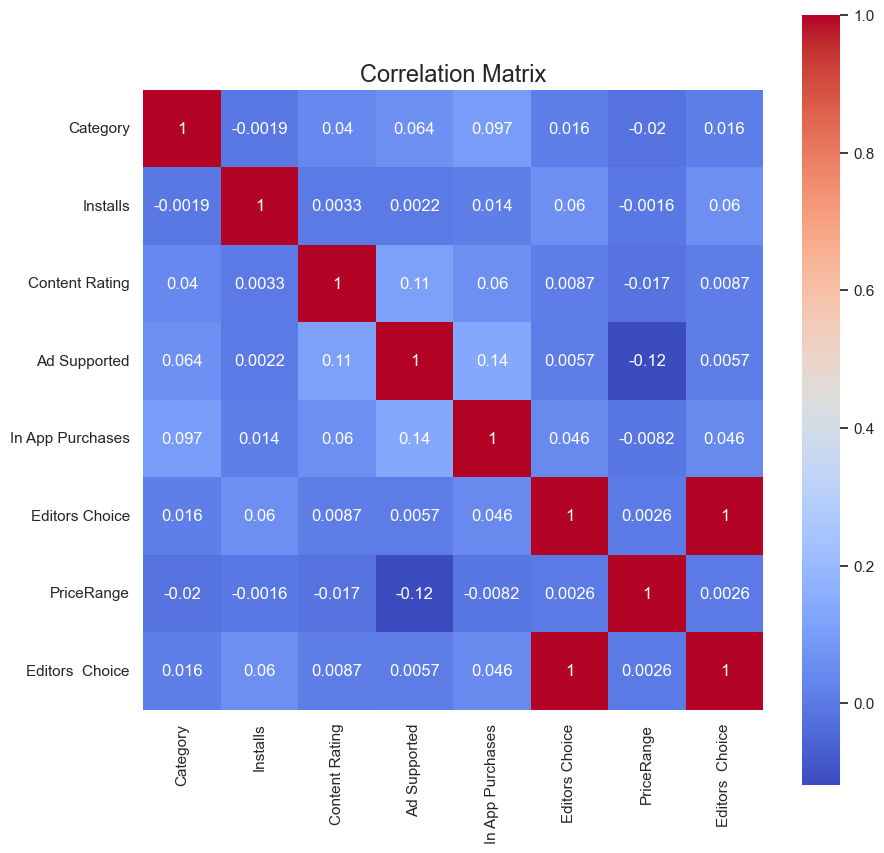

In [83]:
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="coolwarm",square=True, annot=True)
plt.title("Correlation Matrix", fontsize = '17');#

In [84]:
scaler = StandardScaler()
X['Installs'] = scaler.fit_transform(X[['Installs']])

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1618848, 8), (693792, 8), (1618848,), (693792,))

### RandomForest Classifier

In [86]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: include a scaler
    ('rf', RandomForestClassifier())
])

# Define the parameter grid
param_grid = {
    'rf__n_estimators': [5, 10],
    'rf__max_depth': [5, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Train Data:", grid_search.best_score_)

# Make predictions on test data using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy_test)


Best Parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 10}
Best Accuracy on Train Data: 0.8433114172571979
Accuracy on Test Data: 0.8435914510400812


Accuracy = 84.36 %


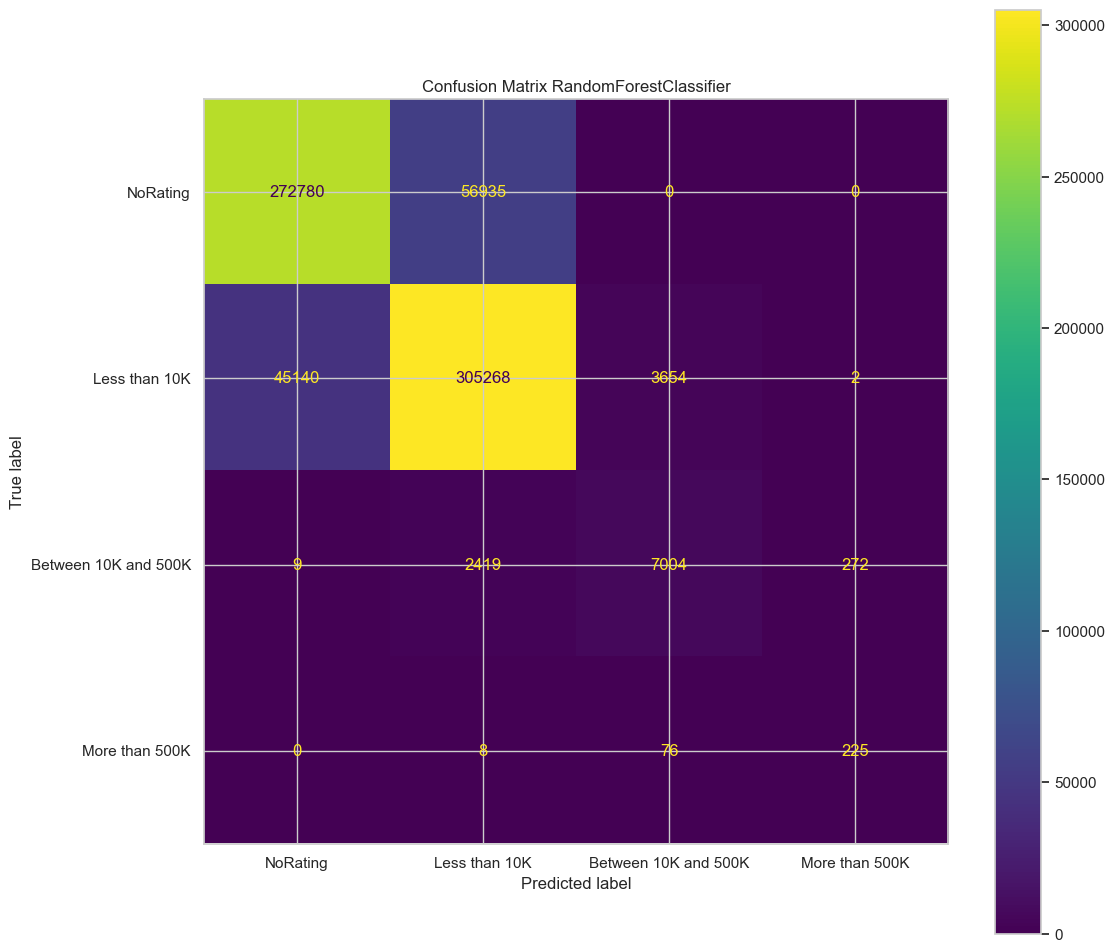

In [87]:
y_pred = grid_search.predict(X_test)
rf_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(rf_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig, ax = plt.subplots(figsize=(12,12));
plt.title("Confusion Matrix RandomForestClassifier")
cmd.plot(ax=ax);

In [88]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for RandomForestClassifier")
print(cr)

Classification Report for RandomForestClassifier
                      precision    recall  f1-score   support

            NoRating       0.83      0.86      0.84    317929
       Less than 10K       0.86      0.84      0.85    364630
Between 10K and 500K       0.72      0.65      0.69     10734
      More than 500K       0.73      0.45      0.56       499

            accuracy                           0.84    693792
           macro avg       0.78      0.70      0.73    693792
        weighted avg       0.84      0.84      0.84    693792



### GradientBoostingClassifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: include a scaler
    ('gb', GradientBoostingClassifier())
])

# Define the parameter grid
param_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5],
    'gb__min_samples_split': [2, 5],
    'gb__min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Train Data:", grid_search.best_score_)

# Make predictions on test data using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model on test data
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy_test)


Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 2, 'gb__n_estimators': 200}
Best Accuracy on Train Data: 0.8429074267205181
Accuracy on Test Data: 0.8424859323831927


Accuracy = 84.25 %


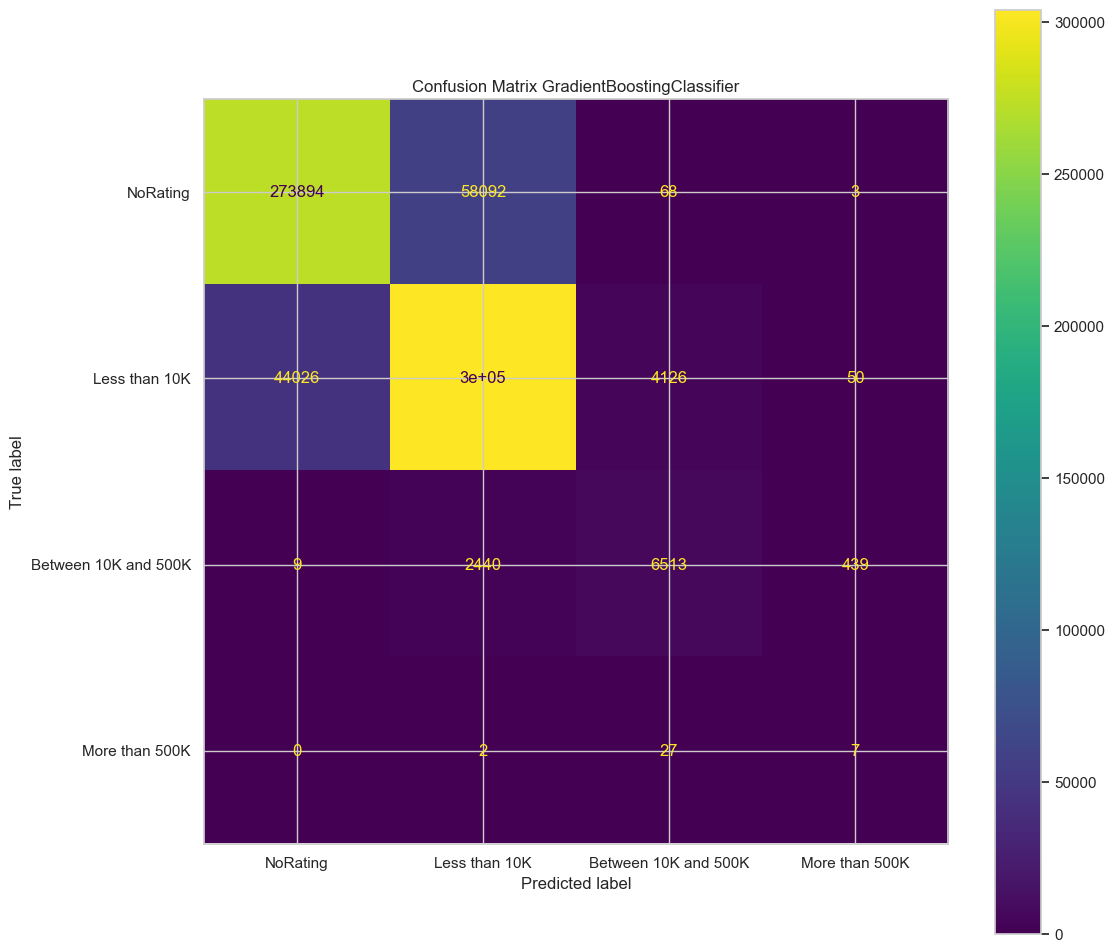

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
y_pred = grid_search.predict(X_test)
rf_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(rf_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig, ax = plt.subplots(figsize=(12,12));
plt.title("Confusion Matrix GradientBoostingClassifier")
cmd.plot(ax=ax);

In [91]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for GradientBoostingClassifier")
print(cr)

Classification Report for GradientBoostingClassifier
                      precision    recall  f1-score   support

            NoRating       0.82      0.86      0.84    317929
       Less than 10K       0.86      0.83      0.85    364630
Between 10K and 500K       0.69      0.61      0.65     10734
      More than 500K       0.19      0.01      0.03       499

            accuracy                           0.84    693792
           macro avg       0.64      0.58      0.59    693792
        weighted avg       0.84      0.84      0.84    693792



In [92]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),              
    ('decision_tree', DecisionTreeClassifier()) 
])

param_grid = {
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [5, 10, 15],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy on Train Data:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy_test)


Best Parameters: {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 15, 'decision_tree__min_samples_leaf': 4, 'decision_tree__min_samples_split': 2}
Best Accuracy on Train Data: 0.8432891793155118
Accuracy on Test Data: 0.8434429915594299


Accuracy = 84.34 %


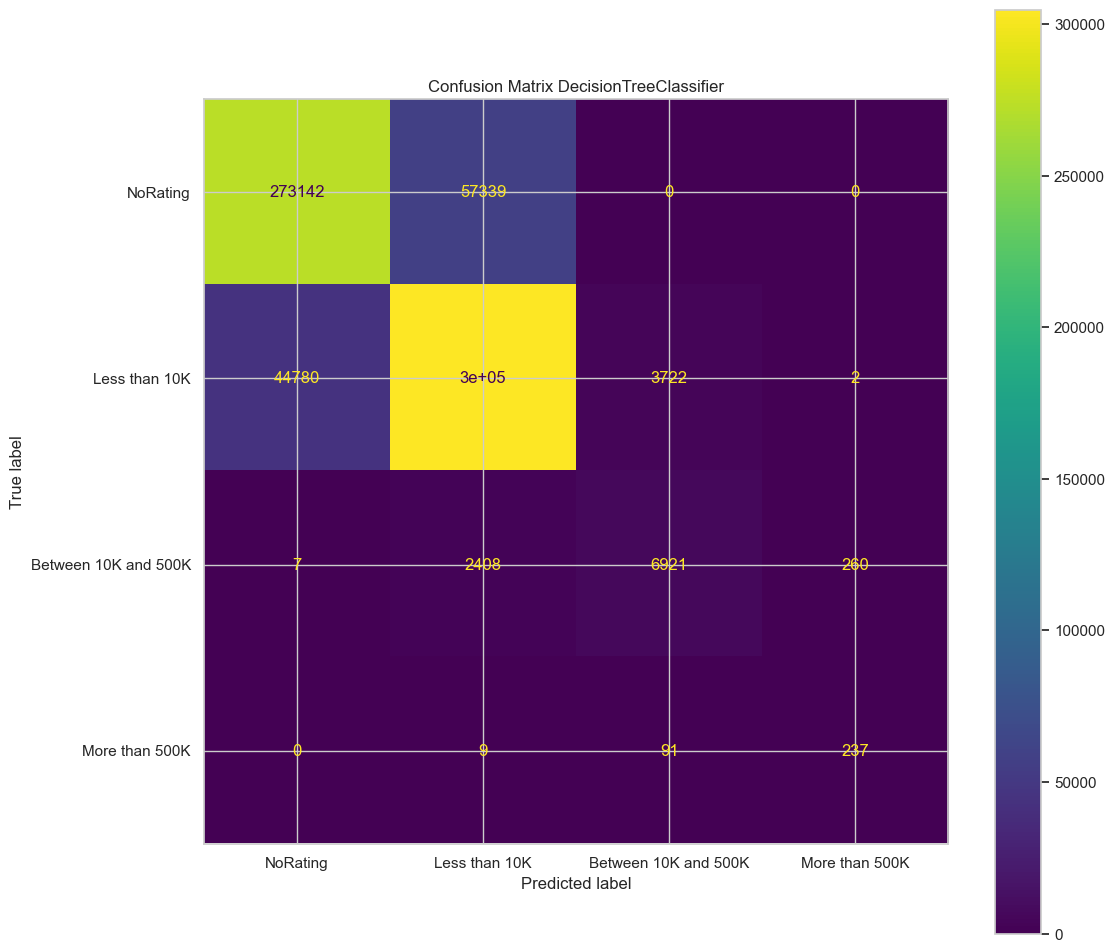

In [93]:
y_pred = grid_search.predict(X_test)
rf_acc = accuracy_score(y_pred,y_test)*100
print("Accuracy =",round(rf_acc,2),"%")
cm = confusion_matrix(y_pred,y_test)

cmd = ConfusionMatrixDisplay(cm,display_labels =['NoRating','Less than 10K','Between 10K and 500K','More than 500K'])
fig, ax = plt.subplots(figsize=(12,12));
plt.title("Confusion Matrix DecisionTreeClassifier")
cmd.plot(ax=ax);

In [94]:
target_names = ['NoRating','Less than 10K','Between 10K and 500K','More than 500K']
cr = classification_report(y_test,y_pred,target_names = target_names)
print("Classification Report for DecisionTreeClassifier")
print(cr)

Classification Report for DecisionTreeClassifier
                      precision    recall  f1-score   support

            NoRating       0.83      0.86      0.84    317929
       Less than 10K       0.86      0.84      0.85    364630
Between 10K and 500K       0.72      0.64      0.68     10734
      More than 500K       0.70      0.47      0.57       499

            accuracy                           0.84    693792
           macro avg       0.78      0.70      0.73    693792
        weighted avg       0.84      0.84      0.84    693792

